In [1]:
# importing libraries

# skimage.transform is used for image processing. 
from skimage import transform
# skimage.data is used for the testing of images
from skimage import data
# matplotlib is used for plotting / for data visualization
import matplotlib.pyplot as plt
# os is for path
import os
# numpy is used for the computation
import numpy as np
# skimage.color is used for the color conversion i.e. manipulating the image
from skimage.color import rgb2gray
# getting random numbers
import random
# for model creation 
import tensorflow as tf 

In [5]:
# creating a function to read the images and their corresponding labels
def load_data(data_directory):
    # Get a list of directories in the specified data directory
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    # Initialize empty lists for storing labels and images
    labels = []
    images = []
    
    # Loop through each directory
    for d in directories:
        # Get the path to the label directory
        label_directory = os.path.join(data_directory, d)
        # Get a list of file names in the label directory
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        
        # Loop through each file name
        for f in file_names:
            # Read the image using data.imread() and append it to the images list
            images.append(data.imread(f))
            # Get the ASCII value of the directory (label) and append it to the labels list
            labels.append(ord(d))
    
    # Return the images and labels as output
    return images, labels

# Set the root path of the project
ROOT_PATH = "C:/Users/Lenovo/flask/images"
# Specify the path to the training data directory
train_data_directory = os.path.join(ROOT_PATH, "train")

# Call the load_data function with the training data directory to load the images and labels
images, labels = load_data(train_data_directory)


In [6]:
# converting to numpy arrays for processing and manipulation
images_array = np.array(images)
labels_array = np.array(labels)

# Print the number of `images`'s elements
print("Total number of images:", images_array.size)

# Count the number of labels
print("Total No of classes:", len(set(labels_array)))

# Convert the label values (ASCII values) to corresponding characters using list comprehension
print("Label Array: ", [chr(X) for X in set(labels)])

Total number of images: 0
Total No of classes: 0
Label Array:  []


IndexError: list index out of range

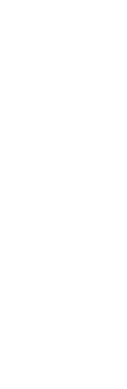

In [7]:
# Determine the (random) indexes of the images that you want to see
hand_signs = [12, 45, 65, 35]

# Fill out the subplots with the random images that you defined
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)  # Create a subplot with 1 row, 4 columns, and the i+1 index
    plt.axis('off')  # Turn off the axis ticks and labels
    plt.imshow(images[hand_signs[i]])  # Display the image corresponding to the index
    plt.subplots_adjust(wspace=0.5)  # Adjust the spacing between subplots

plt.show()  # Show the figure with subplots

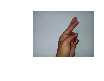

shape: (480, 640, 3), min: 0, max: 255


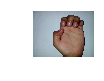

shape: (480, 640, 3), min: 0, max: 255


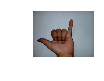

shape: (480, 640, 3), min: 0, max: 219


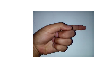

shape: (480, 640, 3), min: 0, max: 238


In [ ]:
# Determine the (random) indexes of the images
hand_signs = [300, 1250, 2650, 3000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[hand_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[hand_signs[i]].shape, 
                                                  images[hand_signs[i]].min(), 
                                                  images[hand_signs[i]].max()))

In [ ]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(chr(label), labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

# Feature Extraction

In [ ]:
# Resize images
images32 = [transform.resize(image, (28, 28,3)) for image in images]
images32 = np.array(images32)

# Image Conversion to Grayscale

In [ ]:
images32 = rgb2gray(np.array(images32))

In [ ]:
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[hand_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

# Model

In [ ]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 100, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

In [ ]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

# Evaluation

In [ ]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

In [ ]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(chr(truth), chr(prediction)), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],cmap='gray')

plt.show()

In [ ]:
sess.close()